# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

print(cities)

Number of cities in the list: 619
['port alfred', 'tasiilaq', 'busselton', 'port-gentil', 'kosiv', 'standerton', 'samusu', 'hermanus', 'ushuaia', 'illoqqortoormiut', 'belushya guba', 'hambantota', 'muli', 'blackwater', 'formiga', 'albany', 'ostrovnoy', 'lebu', 'dzitbalche', 'neckargemund', 'illela', 'camana', 'taolanaro', 'saskylakh', 'norman wells', 'bluff', 'dikson', 'khatanga', 'tiksi', 'grand river south east', 'avarua', 'severo-kurilsk', 'fortuna', 'rikitea', 'castro', 'nemuro', 'chokurdakh', 'kapaa', 'najran', 'mataura', 'todos santos', 'dori', 'scarborough', 'tshikapa', 'ghanzi', 'hilo', 'mar del plata', 'ilulissat', 'amderma', 'sentyabrskiy', 'nantucket', 'port macquarie', 'topi', 'punta arenas', 'matara', 'brawley', 'worcester', 'northam', 'doctor pedro p. pena', 'barrow', 'suzu', 'saint-francois', 'ahipara', 'abu samrah', 'porto novo', 'inhambane', 'butaritari', 'lyngseidet', 'san vicente', 'angoram', 'puerto ayora', 'ust-uda', 'auki', 'berdigestyakh', 'jamestown', 'bandarbey

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the OpenWeatherMap API endpoint URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters and set units to metric
record_count = 1
set_count = 1
units = "metric"

# Loop through all the cities in the list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data for each city
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | port-gentil
Processing Record 5 of Set 1 | kosiv
Processing Record 6 of Set 1 | standerton
Processing Record 7 of Set 1 | samusu
City not found. Skipping...
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | hambantota
Processing Record 13 of Set 1 | muli
Processing Record 14 of Set 1 | blackwater
Processing Record 15 of Set 1 | formiga
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | ostrovnoy
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | dzitbalche
Processing Record 20 of Set 1 | neckargemund
Processing Record 21 of Set 1

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,26.21,87,59,3.58,ZA,1674293740
1,tasiilaq,65.6145,-37.6368,-14.91,78,95,3.75,GL,1674293740
2,busselton,-33.6500,115.3333,30.54,37,0,3.78,AU,1674293741
3,port-gentil,-0.7193,8.7815,28.98,79,20,3.09,GA,1674293742
4,kosiv,48.3107,25.0958,3.55,87,93,0.69,UA,1674293743


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,26.21,87,59,3.58,ZA,1674293740
1,tasiilaq,65.6145,-37.6368,-14.91,78,95,3.75,GL,1674293740
2,busselton,-33.6500,115.3333,30.54,37,0,3.78,AU,1674293741
3,port-gentil,-0.7193,8.7815,28.98,79,20,3.09,GA,1674293742
4,kosiv,48.3107,25.0958,3.55,87,93,0.69,UA,1674293743


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

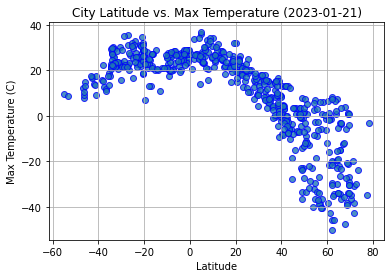

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="blue", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

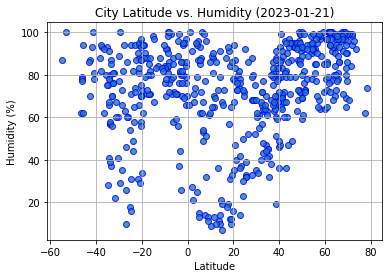

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="blue", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

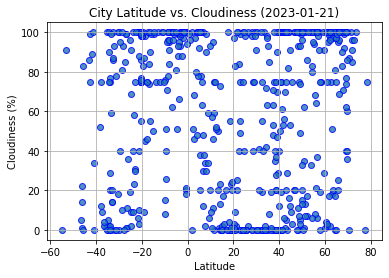

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="blue", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

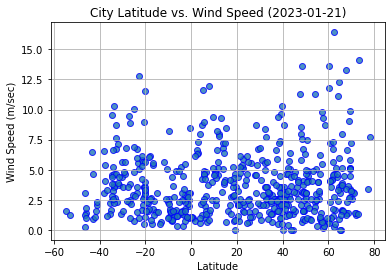

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="blue", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/sec)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def linear_regression(x_data, y_data, y_label, text_coord):
    
    # Calculate regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
    
    # Plot data
    plt.scatter(x_data,y_data)
    plt.plot(x_data,regress_values,"r")
    print(f"The r-squared is: {r_value**2:.3f}")
    
    # Annotate text
    plt.annotate(line_eq, text_coord, fontsize=12, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hem_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
north_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tasiilaq,65.6145,-37.6368,-14.91,78,95,3.75,GL,1674293740
4,kosiv,48.3107,25.0958,3.55,87,93,0.69,UA,1674293743
8,hambantota,6.1241,81.1185,23.19,100,75,1.03,LK,1674293747
9,muli,2.9167,73.5667,26.66,71,68,6.42,MV,1674293748
12,albany,42.6001,-73.9662,-0.18,81,70,1.34,US,1674293428


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hem_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
south_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,26.21,87,59,3.58,ZA,1674293740
2,busselton,-33.6500,115.3333,30.54,37,0,3.78,AU,1674293741
3,port-gentil,-0.7193,8.7815,28.98,79,20,3.09,GA,1674293742
5,standerton,-26.9337,29.2415,31.37,10,99,2.50,ZA,1674293743
6,hermanus,-34.4187,19.2345,22.71,66,2,4.59,ZA,1674293745


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.713


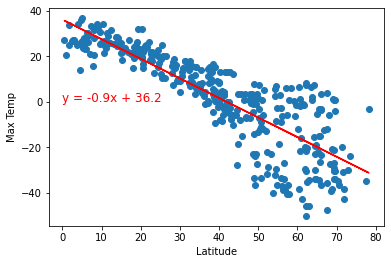

In [35]:
# Linear regression on Northern Hemisphere
x = north_hem_df["Lat"]
y = north_hem_df["Max Temp"]
linear_regression(x, y, 'Max Temp', (0,0))


The r-squared is: 0.182


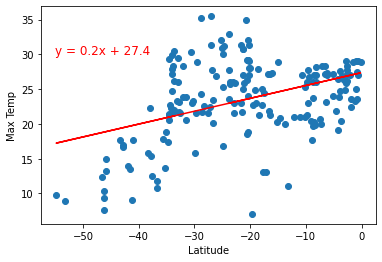

In [36]:
# Linear regression on Southern Hemisphere
x = south_hem_df["Lat"]
y = south_hem_df["Max Temp"]
linear_regression(x, y, 'Max Temp', (-55,30))

**Discussion about the linear relationship:** We observe that maximum temperature in the Northern Hemisphere correlates with latitude, as r-squared is: 0.713; whereby temperature drops according to latitude per the function Temperature = -0.9 * Latitude + 36.2. However, maximum temperature in the Southern Hemisphere does not correlates with latitude, as r-squared is: 0.182.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.241


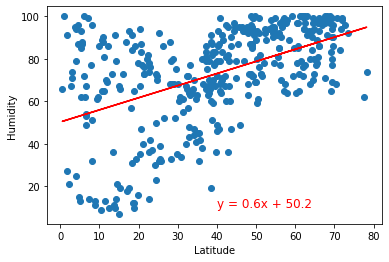

In [37]:
# Northern Hemisphere
x = north_hem_df["Lat"]
y = north_hem_df["Humidity"]
linear_regression(x, y, 'Humidity', (40,10))

The r-squared is: 0.017


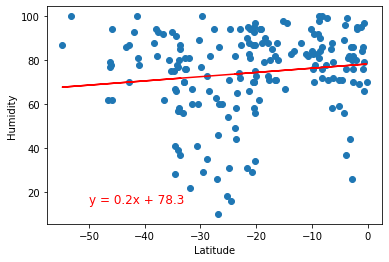

In [39]:
# Southern Hemisphere
x = south_hem_df["Lat"]
y = south_hem_df["Humidity"]
linear_regression(x, y, 'Humidity', (-50,15))

**Discussion about the linear relationship:** We observe that humidity in the Northern Hemisphere as well as in Southern Hemisphere does not correlates with latitude, as r-squared is: 0.241 and 0.017 respectively.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.055


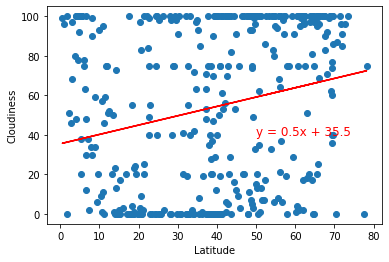

In [41]:
# Northern Hemisphere
x = north_hem_df["Lat"]
y = north_hem_df["Cloudiness"]
linear_regression(x, y, 'Cloudiness', (50,40))

The r-squared is: 0.204


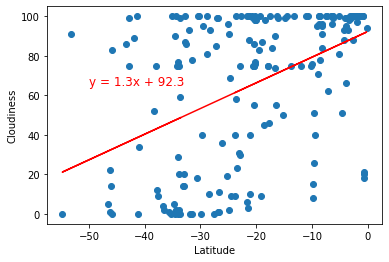

In [43]:
# Southern Hemisphere
x = south_hem_df["Lat"]
y = south_hem_df["Cloudiness"]
linear_regression(x, y, 'Cloudiness', (-50,65))

**Discussion about the linear relationship:** We observe that cloudiness in the Northern Hemisphere as well as in Southern Hemisphere does not correlates with latitude, as r-squared is: 0.055 and 0.204 respectively.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.000


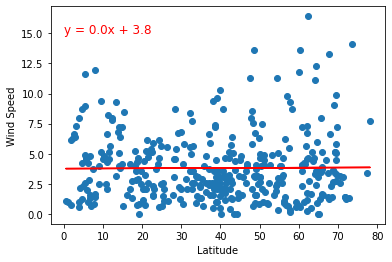

In [45]:
# Northern Hemisphere
x = north_hem_df["Lat"]
y = north_hem_df["Wind Speed"]
linear_regression(x, y, 'Wind Speed', (0,15))

The r-squared is: 0.035


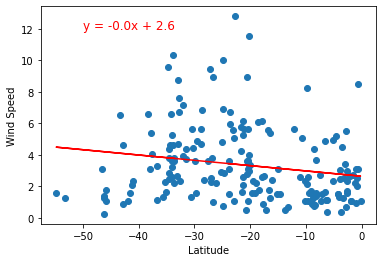

In [47]:
# Southern Hemisphere
x = south_hem_df["Lat"]
y = south_hem_df["Wind Speed"]
linear_regression(x, y, 'Wind Speed', (-50,12))

**Discussion about the linear relationship:** We observe that wind speed in the Northern Hemisphere as well as in Southern Hemisphere does not correlates with latitude, as r-squared is: 0.000 and 0.035 respectively.